LASSO

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
import torch
from log_hazard_binary import g_dnn_bin
from log_linear_binary import E_ols_bin
from log_linear_binary import E_lasso_bin
from optITR import optITR_lin_bin
import time
#As an example for linear case
# patiences = 10
# n_node = 50
# n_layer = 1
# t_nodes = 100
# t_fig = 50
# n_lr = 1e-3
# n_epoch = 1000
# s_k = 0.1*np.arange(100)  #only focus on interval [0,10]
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop = 200

missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Linear(500, 0.5,beta,gamma)

for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r')    
    val_data = gendata_Linear(400, 0.5,beta,gamma)
    train_data = gendata_Linear(1600, 0.5,beta,gamma)
    St = E_lasso_bin(train_data, val_data, test_data,lam_min=-2,lam_max=0,K=5)
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_lin_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat, beta,gamma)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Results:e: 200
0.03942
0.01281185388614778
0.0012694695383927079
0.0007372650504889077


In [3]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
import torch
from log_hazard_binary import g_dnn_bin
from log_linear_binary import E_ols_bin
from log_linear_binary import E_lasso_bin
from optITR import optITR_lin_bin
from optITR import optITR_deep_bin
import time
loop = 200

missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Deep(500, 0.5)

for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r') 
    val_data = gendata_Deep(400, 0.5)
    train_data = gendata_Deep(1600, 0.5)
    St = E_lasso_bin(train_data, val_data, test_data,lam_min=-2,lam_max=0,K=5)
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_deep_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Results:e: 200
0.30044
0.007291529332040028
0.08944425457464351
0.0063510217292375845


RDL

In [4]:
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression,LassoCV
from sklearn.preprocessing import StandardScaler
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep 
from log_dlearn_binary import RDL_bin
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop=200
missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Linear(500, 0.5,beta,gamma)
mu_test = test_data['mu0']
epsilon_test = test_data['epsilon']

for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r')    
    val_data = gendata_Linear(400, 0.5,beta,gamma)
    train_data = gendata_Linear(1600, 0.5,beta,gamma)
    res_rdl = RDL_bin(train_data,val_data,test_data,alphas=np.logspace(-3,0,10))
    d_est = res_rdl['itr_test']
    X_test = test_data['X']
    d_opt = X_test@(gamma-beta)>0 
    d_opt = d_opt.astype(int)
    missrate[i] = np.mean(np.abs(d_opt-d_est))
    #quality value 
    theta = np.vstack((beta,gamma))
    quality = X_test@theta.T
    d_est1 = np.vstack((1-d_est,d_est)) #untreat-treated
    d_opt1 = np.vstack((1-d_opt,d_opt))

    V_est = np.mean(np.exp(np.sum(d_est1.T*quality,axis=1)+mu_test+epsilon_test))

    V_opt = np.mean(np.exp(np.sum(d_opt1.T*quality,axis=1)+mu_test+epsilon_test))
    
    Regret = V_opt - V_est
    regret[i] = Regret
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Results:e: 200
0.04042
0.014917895293907918
0.0014797673389410515
0.001096126616642273


In [5]:
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression,LassoCV
from sklearn.preprocessing import StandardScaler
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep 
from log_dlearn_binary import RDL_bin
# beta = np.array([0,-0.5,0.5,-0.25,0.5])
# gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop=200
missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Deep(500, 0.5)
mu_test = test_data['mu0']
epsilon_test = test_data['epsilon']
for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r')   
    val_data = gendata_Deep(400, 0.5)
    train_data = gendata_Deep(1600, 0.5)
    res_rdl = RDL_bin(train_data,val_data,test_data,alphas=np.logspace(-3,0,10))
    d_est = res_rdl['itr_test']
    X = test_data['X']
    g_X = test_data['g_X']
    h_X = test_data['h_X']
    # g_X =  np.cos(X[:,0]**2+2*X[:,1]**2+X[:,2]**3+np.sqrt(X[:,3]+1)*np.log(X[:,4]+2)/20)
        #A=1, influence h_X
    # h_X = X[:,0]/3 + np.exp(X[:,1])/4 + np.cos(X[:,2]* X[:,3])\
                # - (np.log(X[:,4]+2))/3 -1
    d_opt = (h_X-g_X)>0
    d_opt = d_opt.astype(int)
    missrate[i] = np.mean(np.abs(d_opt-d_est))

    
    quality = (np.vstack((g_X , h_X))).T
    d_est1 = np.vstack((1-d_est,d_est)) #untreat-treated
    d_opt1 = np.vstack((1-d_opt,d_opt))

    V_est = np.mean(np.exp(np.sum(d_est1.T*quality,axis=1)+mu_test+epsilon_test))

    V_opt = np.mean(np.exp(np.sum(d_opt1.T*quality,axis=1)+mu_test+epsilon_test))
    Regret = V_opt - V_est
    regret[i] = Regret
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))


Results:e: 200
0.31103
0.009951839026029318
0.09756034588043118
0.00837370245963873


SDL

In [6]:
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression,LassoCV
from sklearn.preprocessing import StandardScaler
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep 
from log_dlearn_binary import SDL_bin
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop=200
missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Linear(500, 0.5,beta,gamma)
mu_test = test_data['mu0']
epsilon_test = test_data['epsilon']
for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r')   
    val_data = gendata_Linear(400, 0.5,beta,gamma)
    train_data = gendata_Linear(1600, 0.5,beta,gamma)
    res_sdl = SDL_bin(train_data,val_data,test_data,alphas=np.logspace(-3,0,10),precompute=False)
    d_est = res_sdl['itr_test']
    X_test = test_data['X']
    d_opt = X_test@(gamma-beta)>0 
    d_opt = d_opt.astype(int)
    missrate[i] = np.mean(np.abs(d_opt-d_est))
    #quality value 
    theta = np.vstack((beta,gamma))
    quality = X_test@theta.T
    d_est1 = np.vstack((1-d_est,d_est)) #untreat-treated
    d_opt1 = np.vstack((1-d_opt,d_opt))

    V_est = np.mean(np.exp(np.sum(d_est1.T*quality,axis=1)+mu_test+epsilon_test))

    V_opt = np.mean(np.exp(np.sum(d_opt1.T*quality,axis=1)+mu_test+epsilon_test))
    
    Regret = V_opt - V_est
    regret[i] = Regret
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))


Results:e: 200
0.38083
0.12312908307950646
0.1461865601867651
0.06856676945994732


In [7]:
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression,LassoCV
from sklearn.preprocessing import StandardScaler
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep 
from log_dlearn_binary import SDL_bin
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop=200
missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Deep(500, 0.5)
mu_test = test_data['mu0']
epsilon_test = test_data['epsilon']
for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r')  
    val_data = gendata_Deep(400, 0.5)
    train_data = gendata_Deep(1600, 0.5)
    res_sdl = SDL_bin(train_data,val_data,test_data,alphas=np.logspace(-3,0,10),precompute=False)
    d_est = res_sdl['itr_test']
    X = test_data['X']
    g_X = test_data['g_X']
    h_X = test_data['h_X']
    # g_X =  np.cos(X[:,0]**2+2*X[:,1]**2+X[:,2]**3+np.sqrt(X[:,3]+1)*np.log(X[:,4]+2)/20)
        #A=1, influence h_X
    # h_X = X[:,0]/3 + np.exp(X[:,1])/4 + np.cos(X[:,2]* X[:,3])\
                # - (np.log(X[:,4]+2))/3 -1
    d_opt = (h_X-g_X)>0
    d_opt = d_opt.astype(int)
    missrate[i] = np.mean(np.abs(d_opt-d_est))
    
    quality = (np.vstack((g_X , h_X))).T
    d_est1 = np.vstack((1-d_est,d_est)) #untreat-treated
    d_opt1 = np.vstack((1-d_opt,d_opt))

    V_est = np.mean(np.exp(np.sum(d_est1.T*quality,axis=1)+mu_test+epsilon_test))

    V_opt = np.mean(np.exp(np.sum(d_opt1.T*quality,axis=1)+mu_test+epsilon_test))
    Regret = V_opt - V_est
    regret[i] = Regret
    # regret[i] = ditr['Regret']
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))


Results:e: 200
0.3044799999999999
0.025781574816135657
0.09219553998951965
0.017183824263074958


DL

In [1]:
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression,LassoCV
from sklearn.preprocessing import StandardScaler
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep 
from log_dlearn_binary import DL_bin
import warnings
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop=200
missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Linear(500, 0.5,beta,gamma)
mu_test = test_data['mu0']
epsilon_test = test_data['epsilon']
warnings.filterwarnings('ignore')
for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r')   
    val_data = gendata_Linear(400, 0.5,beta,gamma)
    train_data = gendata_Linear(1600, 0.5,beta,gamma)
    res_sdl = DL_bin(train_data,val_data,test_data,alphas=np.logspace(-3,0,10),precompute=False)
    d_est = res_sdl['itr_test']
    X_test = test_data['X']
    d_opt = X_test@(gamma-beta)>0 
    d_opt = d_opt.astype(int)
    missrate[i] = np.mean(np.abs(d_opt-d_est))
    #quality value 
    theta = np.vstack((beta,gamma))
    quality = X_test@theta.T
    d_est1 = np.vstack((1-d_est,d_est)) #untreat-treated
    d_opt1 = np.vstack((1-d_opt,d_opt))

    V_est = np.mean(np.exp(np.sum(d_est1.T*quality,axis=1)+mu_test+epsilon_test))

    V_opt = np.mean(np.exp(np.sum(d_opt1.T*quality,axis=1)+mu_test+epsilon_test))
    
    Regret = V_opt - V_est
    regret[i] = Regret
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Results:e: 200
0.04374000000000001
0.0157965945697166
0.0023030268534291274
0.00253926443545706


In [2]:
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression,LassoCV
from sklearn.preprocessing import StandardScaler
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep 
from log_dlearn_binary import DL_bin
import warnings
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop=200
missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Deep(500, 0.5)
mu_test = test_data['mu0']
epsilon_test = test_data['epsilon']
warnings.filterwarnings('ignore')
for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r')  
    val_data = gendata_Deep(400, 0.5)
    train_data = gendata_Deep(1600, 0.5)
    res_sdl = DL_bin(train_data,val_data,test_data,alphas=np.logspace(-3,0,10),precompute=False)
    d_est = res_sdl['itr_test']
    X = test_data['X']
    g_X = test_data['g_X']
    h_X = test_data['h_X']
    # g_X =  np.cos(X[:,0]**2+2*X[:,1]**2+X[:,2]**3+np.sqrt(X[:,3]+1)*np.log(X[:,4]+2)/20)
        #A=1, influence h_X
    # h_X = X[:,0]/3 + np.exp(X[:,1])/4 + np.cos(X[:,2]* X[:,3])\
                # - (np.log(X[:,4]+2))/3 -1
    d_opt = (h_X-g_X)>0
    d_opt = d_opt.astype(int)
    missrate[i] = np.mean(np.abs(d_opt-d_est))
    
    quality = (np.vstack((g_X , h_X))).T
    d_est1 = np.vstack((1-d_est,d_est)) #untreat-treated
    d_opt1 = np.vstack((1-d_opt,d_opt))

    V_est = np.mean(np.exp(np.sum(d_est1.T*quality,axis=1)+mu_test+epsilon_test))

    V_opt = np.mean(np.exp(np.sum(d_opt1.T*quality,axis=1)+mu_test+epsilon_test))
    Regret = V_opt - V_est
    regret[i] = Regret
    # regret[i] = ditr['Regret']
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))


Results:e: 200
0.30289999999999995
0.010265963179361213
0.09008549934575118
0.008274663930516726


OLS

In [8]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
import torch
from log_hazard_binary import g_dnn_bin
from log_linear_binary import E_ols_bin
from optITR import optITR_lin_bin
import time
#As an example for linear case
# patiences = 10
# n_node = 50
# n_layer = 1
# t_nodes = 100
# t_fig = 50
# n_lr = 1e-3
# n_epoch = 1000
# s_k = 0.1*np.arange(100)  #only focus on interval [0,10]
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop = 200

missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Linear(500, 0.5,beta,gamma)

for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r')   
    val_data = gendata_Linear(400, 0.5,beta,gamma)
    train_data = gendata_Linear(1600, 0.5,beta,gamma)
    St = E_ols_bin(train_data, val_data, test_data)
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_lin_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat, beta,gamma)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Results:e: 200
0.029740000000000003
0.012277312409481158
0.001023077310838273
0.000858529772706826


In [ ]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
import torch
from log_hazard_binary import g_dnn_bin
from log_linear_binary import E_ols_bin
from optITR import optITR_lin_bin
from optITR import optITR_deep_bin
import time
loop = 200

missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Deep(500, 0.5)

for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r')
    val_data = gendata_Deep(400, 0.5)
    train_data = gendata_Deep(1600, 0.5)
    St = E_ols_bin(train_data, val_data, test_data)
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_deep_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Results:e: 199
0.30196
0.009556066136229916
0.0890642576917686
0.007357801211209192


DLS

In [10]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
import torch
from log_dls_binary import E_dls_bin
from optITR import optITR_lin_bin
from optITR import optITR_deep_bin
import time
loop = 200
patiences = 20
n_node = 64
n_layer = 2
n_lr = 1.2e-3
n_epoch = 1000
missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
test_data = gendata_Linear(500, 0.5,beta,gamma)
for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r') 
    val_data = gendata_Linear(400, 0.5,beta,gamma)
    train_data = gendata_Linear(1600, 0.5,beta,gamma)
    St = E_dls_bin(train_data, val_data, test_data, n_layer, n_node, n_lr, n_epoch, patiences,show_val=False)
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_lin_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat,beta,gamma)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Results:e: 200
0.06261000000000001
0.019975182101798224
0.005943755394911795
0.0046932696412251345


In [11]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Deep
import torch
from log_dls_binary import E_dls_bin
from optITR import optITR_lin_bin
from optITR import optITR_deep_bin
import time
loop = 200
patiences = 20
n_node = 64
n_layer = 2
n_lr = 1.2e-3
n_epoch = 1000
missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Deep(500, 0.5)
for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r') 
    val_data = gendata_Deep(400, 0.5)
    train_data = gendata_Deep(1600, 0.5)
    St = E_dls_bin(train_data, val_data, test_data, n_layer, n_node, n_lr, n_epoch, patiences,show_val=False)
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_deep_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Results:e: 200
0.08460000000000001
0.025374002443445925
0.012230055486173785
0.009183698365905792


Proposed

In [1]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
import torch
from log_hazard_binary import g_dnn_bin
from optITR import optITR_lin_bin
import time
#As an example for linear case
patiences = 20
n_node = 64
n_layer = 1
t_nodes = 100
t_fig = 50
n_lr = 1.1e-4
n_epoch = 1000
s_k = 0.1*np.arange(100)  #only focus on interval [0,10]
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop = 200

missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Linear(500, 0.5,beta,gamma)

for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r')   
    val_data = gendata_Linear(400, 0.5,beta,gamma)
    train_data = gendata_Linear(1600, 0.5,beta,gamma)
    St = g_dnn_bin(train_data, val_data, test_data, t_nodes, t_fig, s_k, n_layer, n_node, n_lr, n_epoch, patiences,show_val=False)
    S_R_X_ibs = St['S_R_X_untreat']
    S_R_X_ibs1 = St['S_R_X_treated']
    Lambda_R_X_untreat = St['Lambda_R_X_untreat']
    Lambda_R_X_treated = St['Lambda_R_X_treated']
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_lin_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat, beta,gamma)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Results:e: 200
0.05548
0.015702534827218183
0.00379098326959181
0.00305598483795217


[0.062 0.034 0.048 0.038 0.034 0.068 0.044 0.04  0.046 0.052 0.078 0.054
 0.058 0.052 0.064 0.036 0.11  0.064 0.04  0.024 0.046 0.048 0.046 0.038
 0.044 0.052 0.048 0.08  0.072 0.044 0.066 0.068 0.052 0.046 0.036 0.066
 0.032 0.044 0.044 0.054 0.042 0.068 0.042 0.066 0.07  0.05  0.068 0.034
 0.038 0.06  0.042 0.05  0.11  0.052 0.036 0.052 0.044 0.042 0.04  0.074
 0.046 0.064 0.036 0.046 0.054 0.08  0.048 0.08  0.07  0.05  0.048 0.054
 0.07  0.054 0.058 0.052 0.076 0.064 0.08  0.036 0.056 0.052 0.062 0.058
 0.07  0.048 0.052 0.07  0.04  0.064 0.042 0.052 0.052 0.062 0.052 0.066
 0.054 0.042 0.048 0.088 0.044 0.076 0.072 0.048 0.07  0.042 0.04  0.064
 0.054 0.034 0.058 0.048 0.058 0.054 0.046 0.124 0.044 0.088 0.044 0.05
 0.05  0.048 0.046 0.1   0.026 0.05  0.042 0.058 0.048 0.044 0.06  0.056
 0.03  0.066 0.064 0.048 0.042 0.064 0.046 0.06  0.038 0.06  0.046 0.054
 0.054 0.076 0.046 0.054 0.074 0.038 0.036 0.058 0.044 0.07  0.08  0.082
 0.068 0.054 0.078 0.09  0.048 0.06  0.05  0.048 0.0

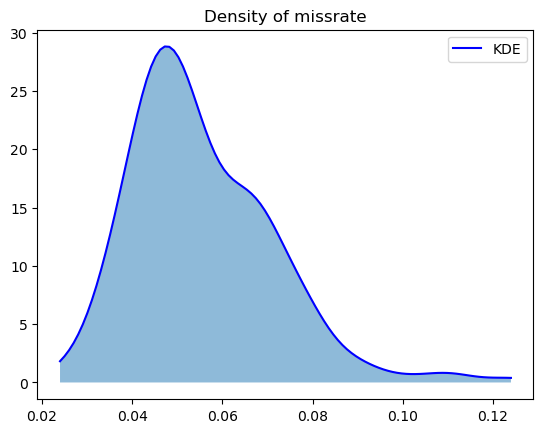

[0.00306763 0.0026965  0.00143174 0.00063782 0.00105428 0.00267102
 0.00194459 0.00143494 0.00212089 0.00162962 0.00851925 0.01054807
 0.00380216 0.00288734 0.00285131 0.00269993 0.01376659 0.01304041
 0.002052   0.001044   0.00175856 0.00171851 0.00216343 0.00175669
 0.00184512 0.00451693 0.00227522 0.00624303 0.00493594 0.00222343
 0.00288791 0.00228391 0.00155521 0.00216575 0.00055272 0.00464099
 0.00247166 0.00206703 0.00096856 0.00485193 0.00099438 0.00708447
 0.00332246 0.00608794 0.00385078 0.00122879 0.00419869 0.00128316
 0.00123403 0.00492045 0.00073717 0.00283501 0.01015472 0.00417296
 0.00090962 0.00273258 0.00119423 0.00208382 0.00185477 0.00550179
 0.00842503 0.00522396 0.00125404 0.00262616 0.0040106  0.0052495
 0.0021846  0.00415359 0.00300725 0.00307054 0.00191126 0.00276435
 0.00772139 0.00202646 0.00321448 0.00217489 0.00316087 0.00351454
 0.00499413 0.0020309  0.00392308 0.00324108 0.01654674 0.00222884
 0.0040304  0.00270577 0.00307623 0.00519018 0.0019405  0.00145

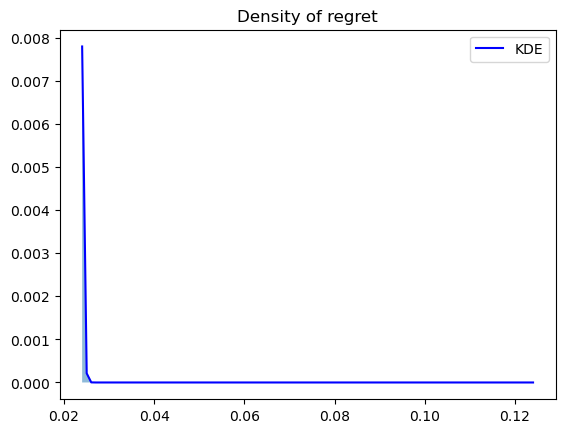

In [2]:
from scipy.stats import gaussian_kde

print(missrate)
print(np.mean(missrate))
# plt.plot(missrate)
kde1 = gaussian_kde(missrate)
xval = np.linspace(min(missrate),max(missrate),100)
yval = kde1(xval)
plt.plot(xval,yval,label='KDE',color='blue')
plt.fill_between(xval,yval,alpha=0.5)
plt.title('Density of missrate')
plt.legend()
plt.show()


print(regret)
# plt.plot(regret)
kde2 = gaussian_kde(regret)
xva2 = np.linspace(min(missrate),max(missrate),100)
yva2 = kde2(xva2)
plt.plot(xva2,yva2,label='KDE',color='blue')
plt.fill_between(xva2,yva2,alpha=0.5)
plt.title('Density of regret')
plt.legend()
plt.show()

In [13]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
import torch
from log_hazard_binary import g_dnn_bin
from optITR import optITR_deep_bin
import time
#As an example for linear case
patiences = 20
n_node = 64
n_layer = 2
t_nodes = 100
t_fig = 50
n_lr = 1.2e-3
n_epoch = 1000
s_k = 0.1*np.arange(100)  #only focus on interval [0,10]
# beta = np.array([0,-0.5,0.5,-0.25,0.5])
# gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop = 200

missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Deep(500, 0.5)

for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r') 
    val_data = gendata_Deep(400, 0.5)
    train_data = gendata_Deep(1600, 0.5)
    St = g_dnn_bin(train_data, val_data, test_data, t_nodes, t_fig, s_k, n_layer, n_node, n_lr, n_epoch, patiences,show_val=False)
    S_R_X_ibs = St['S_R_X_untreat']
    S_R_X_ibs1 = St['S_R_X_treated']
    Lambda_R_X_untreat = St['Lambda_R_X_untreat']
    Lambda_R_X_treated = St['Lambda_R_X_treated']
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_deep_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Results:e: 200
0.08301
0.016446273134056846
0.011787960564711937
0.004448634579710911
